In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

1. Read File

In [ ]:
data_restoran = pd.read_excel('/content/restoran.xlsx')
print (data_restoran)

     id  pelayanan  makanan
0     1         58        7
1     2         54        1
2     3         98        2
3     4         52        4
4     5         11        4
..  ...        ...      ...
95   96         30        1
96   97         25        3
97   98         27       10
98   99          8        6
99  100         11        8

[100 rows x 3 columns]


Membership Function

In [ ]:
#membership function pelayanan
# a = 34, b = 48, c = 59, d = 70
def pelayanan_tinggi(x):
  if (x <= 59):
    return 0
  elif (x > 70):
    return 1
  elif (x > 59 and x <= 70):
    return ((x-59)/(70-59))

def pelayanan_sedang(x):
  if (x <= 34 or x > 70):
    return 0
  elif (x > 34 and x <= 48):
    return ((x-34)/(48-34))
  elif (x > 48 and x <= 59):
    return 1
  elif (x > 59 and x <= 70):
    return ((70-x)/(70-59))

def pelayanan_rendah(x):
  if (x <= 34):
    return 1
  elif (x > 48):
    return 0
  elif (x > 34 and x <= 48):
    return ((48-x)/(48-34))

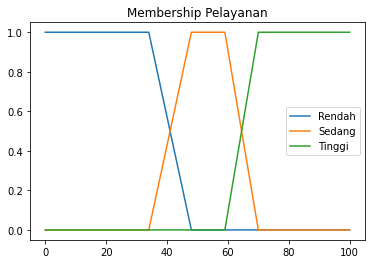

In [ ]:
# grafik keanggotaan kualitas pelayanan

x1 = [0, 34, 48, 100]
y1 = [1, 1, 0, 0]

x2 = [0, 34, 48, 59, 70, 100]
y2 = [0, 0, 1, 1, 0, 0]

x3 = [0, 59, 70, 100]
y3 = [0, 0, 1, 1]

plt.plot(x1, y1, label='Rendah')
plt.plot(x2, y2, label='Sedang')
plt.plot(x3, y3, label='Tinggi')
plt.title("Membership Pelayanan")
plt.legend()

In [ ]:
#membership kualitas makanan
# a = 3, b = 4, c = 6, d = 8

def highQualityFood(x):
  if (x <= 6):
    return 0
  elif (x > 8):
    return 1
  elif (x > 6 and x <= 8):
    return ((x-6)/(8-6))

def avgQualityFood(x):
  if (x <= 3 or x > 8):
    return 0
  elif (x > 3 and x <= 4):
    return ((x-3)/(4-3))
  elif (x > 4 and x <= 6):
    return 1
  elif (x > 6 and x <= 8):
    return ((8-x)/(8-6))

def lowQualityFood(x):
  if (x <= 3):
    return 1
  elif (x > 4):
    return 0
  elif (x > 3 and x <= 4):
    return ((4-x)/(4-3))

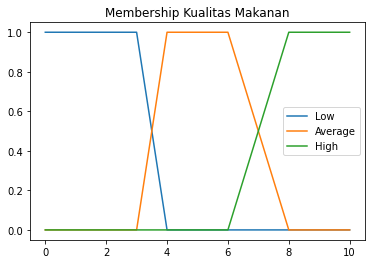

In [ ]:
# grafik keanggotaan kualitas makanan
x1 = [0, 3, 4, 10]
y1 = [1, 1, 0, 0]

x2 = [0, 3, 4, 6, 8, 10]
y2 = [0, 0, 1, 1, 0, 0]

x3 = [0, 6, 8, 10]
y3 = [0, 0, 1, 1]

plt.plot(x1, y1, label='Low')
plt.plot(x2, y2, label='Average')
plt.plot(x3, y3, label='High')
plt.title("Membership Kualitas Makanan")
plt.legend()

2. Fuzzifikasi

In [ ]:
#fuzzifikasi

def q_pelayanan(x):
  tinggi = pelayanan_tinggi(x)
  sedang = pelayanan_sedang(x)
  rendah = pelayanan_rendah(x)
  return tinggi, sedang, rendah

def q_makanan(x):
  high = highQualityFood(x)
  avg = avgQualityFood(x)
  low = lowQualityFood(x)
  return high, avg, low

3. Inferensi

In [ ]:
#Inferensi
def inferensi(tinggi, sedang, rendah, high, avg, low):
  nk =[
  [min(tinggi,high), "accepted"],
  [min(tinggi,avg), "accepted"],
  [min(sedang,high), "accepted"],
  [min(tinggi,low), "considered"],
  [min(rendah,high), "considered"],
  [min(sedang,avg), "considered"],
  [min(sedang,low), "rejected"],
  [min(rendah,avg), "rejected"],
  [min(rendah,low), "rejected"]]

  ac = []
  co = []
  re = []
  for i in range(len(nk)):
    if nk[i][1] == "accepted":
      ac.append(nk[i][0])
    elif nk[i][1] == "considered":
      co.append(nk[i][0])
    elif nk[i][1] == "rejected":
      re.append(nk[i][0])
  return max(ac), max(co), max(re)


4. Defuzzification

In [ ]:
#defuzzification takagi-sugeno style
def defuzzy(ac, co, re):
  return (ac*100)+(co*59)+(re*34)/(ac+co+re)

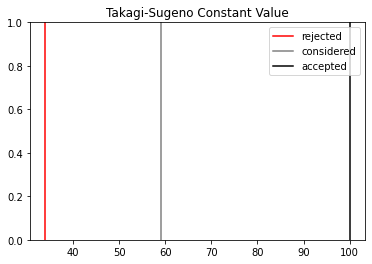

In [ ]:
#grafik takagi-sugeno style
plt.title("Takagi-Sugeno Constant Value")
plt.axvline(x=34, color="red", label="rejected")
plt.axvline(x=59, color="grey", label="considered")
plt.axvline(x=100, color="black", label="accepted")
plt.legend()

Main Program

In [ ]:
#main 
pelayanan = []
makanan = []
for i in range(len(data_restoran)):
  pelayanan.append(data_restoran["pelayanan"][i])
  makanan.append(data_restoran["makanan"][i])

hasil = []
final = []
for i in range (len(data_restoran)):
  tinggi, sedang, rendah = q_pelayanan(pelayanan[i])
  high, avg, low = q_makanan(makanan[i])
  ac, co, re = inferensi(tinggi, sedang, rendah, high, avg, low)
  nilai = defuzzy(ac, co, re)
  hasil.append([nilai, (i+1)])

hasil.sort(reverse=True)

for i in range(10):
  final.append(hasil[i][1])

result = pd.DataFrame(final)
result.columns = ["id"]
result.to_excel("peringkat.xlsx", index=False)
print(result)

   id
0  79
1  70
2  69
3  60
4  51
5  42
6  34
7  31
8  27
9  24


In [ ]:
result

,id
0,79
1,70
2,69
3,60
4,51
5,42
6,34
7,31
8,27
9,24
